# ARIMA - Auto Regression Integrated Moving Average

# SARIMA - Seasonal Auto Regression Integrated Moving Average

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("footfalls.csv")
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [3]:
df['Date'] = pd.to_datetime(df.Month,format="%b-%y")
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01


In [4]:
df['month'] = df.Date.dt.strftime('%b')
df['year'] = df.Date.dt.strftime('%Y')
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,2004


In [5]:
ts = pd.DataFrame(df,columns = ['Date','Footfalls'])
ts

,Date,Footfalls
0,1991-01-01,1709
1,1991-02-01,1621
2,1991-03-01,1973
3,1991-04-01,1812
4,1991-05-01,1975
...,...,...
154,2003-11-01,2076
155,2003-12-01,2141
156,2004-01-01,1832
157,2004-02-01,1838


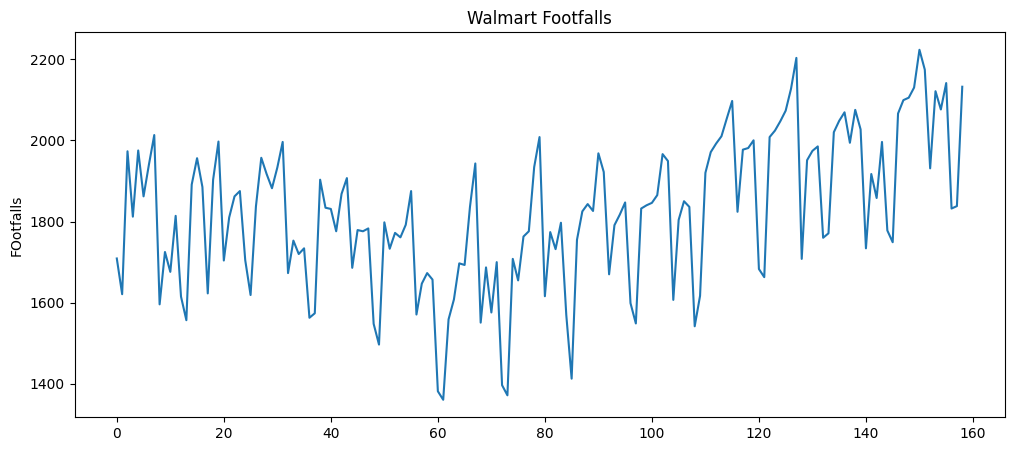

In [8]:
ts['Footfalls'].plot(figsize = (12,5),title = "Walmart Footfalls",ylabel = "FOotfalls")
plt.show()

In [9]:
## Augmented Dickey-Fuller(ADF) test fpr checking stationarity of series
### h0 :series is not stationary
### ha:series is stationary

In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts["Footfalls"])
print("ADF Statistic:",result[0])
print("P values:",result[1])
result

ADF Statistic: -0.2349911287786694
P values: 0.9342202042969283


(-0.2349911287786694,
 0.9342202042969283,
 14,
 144,
 {'1%': -3.476597917537401,
  '5%': -2.8818291230495543,
  '10%': -2.5775887982253085},
 1646.0586457198485)

In [13]:
if (result[1] < 0.05):
    print("Reject Null Hypothesis:Series is stationary")
else:
    print("Accept Null Hypothesis:Series is not stationary")

Accept Null Hypothesis:Series is not stationary


In [15]:
# 1st order differencing

In [16]:
ts_diff = ts['Footfalls'].diff().dropna()

result_diff = adfuller(ts_diff)
print("ADF Statistic after 1st differencing:",result_diff[0])
print("P values:",result_diff[1])

ADF Statistic after 1st differencing: -3.3268427154300464
P values: 0.013720419909835085


In [18]:
if (result_diff[1] < 0.05):
    print("Reject Null Hypothesis:Series is stationary")
else:
    print("Accept Null Hypothesis:Series is not stationary")

Reject Null Hypothesis:Series is stationary


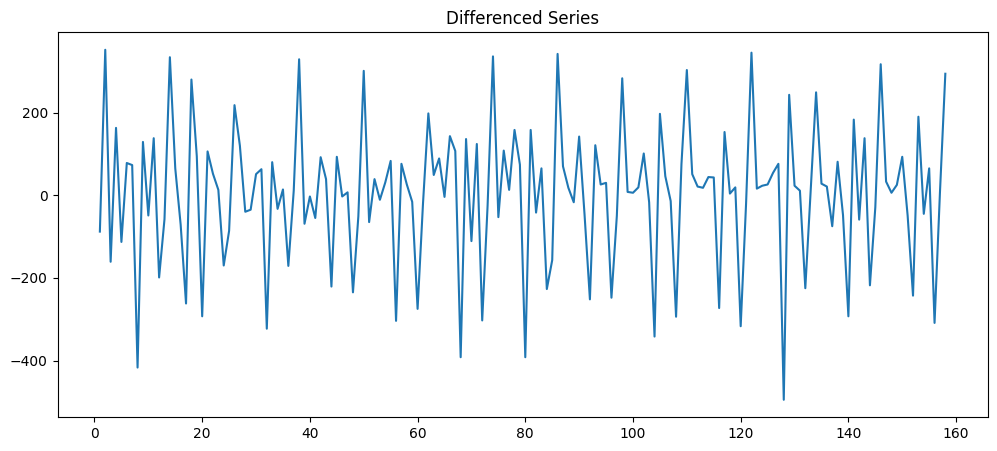

In [17]:
ts_diff.plot(figsize = (12,5),title = "Differenced Series")
plt.show()

#### plot acf pacf

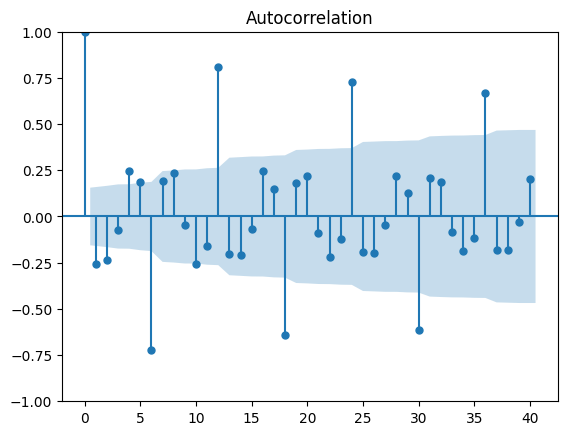

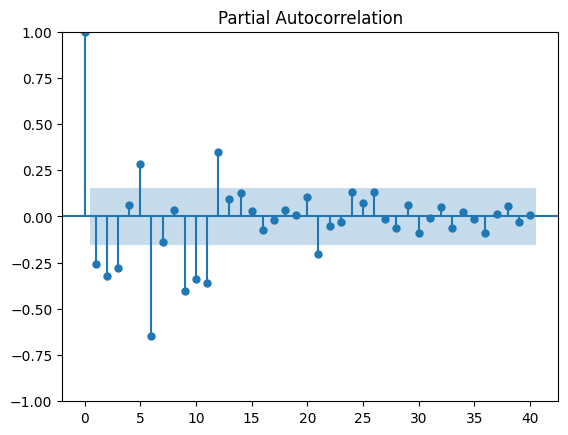

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(ts_diff,lags = 40)
plot_pacf(ts_diff,lags = 40)
plt.show()

In [23]:
import pmdarima as pm
stepwise_model = pm.auto_arima(ts['Footfalls'],
                        start_p = 1,start_q = 1,
                        max_p = 3,end_q=3,
                        d=None,seasonal=True,m=12, 
                        start_P=0,start_Q=0,
                        max_P=3,max_Q=3,
                        D=None,trace=True,error_action='ignore', 
                        suppress_warnings=True,stepwise=True)

stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2026.947, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2072.224, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1948.860, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2070.264, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2042.357, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1786.310, Time=0.80 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1827.620, Time=0.33 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1798.459, Time=2.60 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1790.138, Time=2.75 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1906.436, Time=1.43 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1803.783, Time=1.72 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1809.141, Time=0.37 sec
 ARIMA(1,1,1)(1,0,1)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  159
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -886.497
Date:                            Sat, 20 Sep 2025   AIC                           1784.995
Time:                                    11:19:24   BIC                           1803.370
Sample:                                         0   HQIC                          1792.457
                                            - 159                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0039      0.050      0.079      0.937      -0.093       0.101
ar.L1          0.3487      0.126      2.770      0.006       0.102       0.595
ma.L1         -0.7670      0.098     -7.845      0.000      -0.959      -0.575
ar.S.L12       0.9940      0.005    183.215      0.000       0.983       1.005
ma.S.L12      -0.7486      0.097     -7.737      0.000      -0.938      -0.559
sigma2      3585.6936    471.299      7.608      0.000    2661.965    4509.422
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 2.15
Prob(Q):                              0.63   Prob(JB):                         0.34
Heteroskedasticity (H):               0.60   Skew:                            -0.28
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## build final model

## from statsmodels.tsa.statespace.sarimax import SARIMAX
final_model = SARIMAX(ts['Footfalls'],order = (1,1,1),seasonal_order =(1,0,1,12))
results = final_model.fit()
results.summary()

In [26]:
n_forecast = 12
forecast = results.get_forecast(steps = n_forecast)
forecast_ci = forecast.conf_int()
forecast

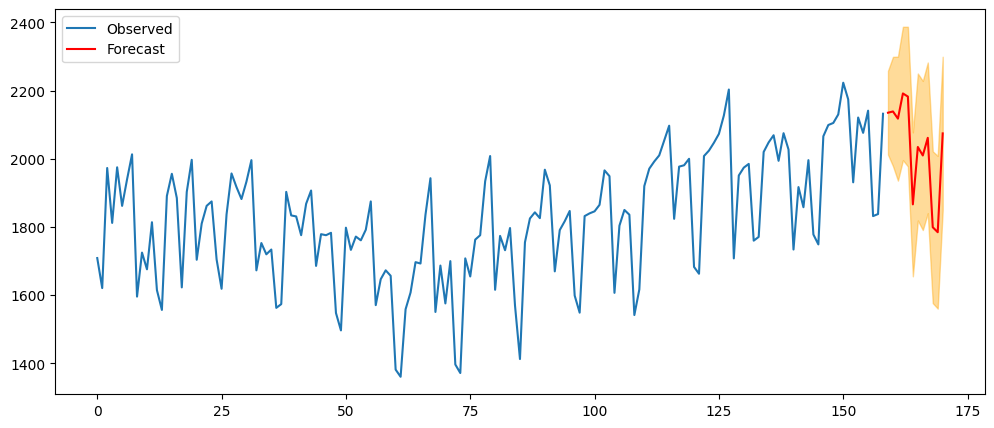

In [30]:
#plot the forecasted values
plt.figure(figsize = (12,5))
plt.plot(ts.index,ts['Footfalls'],label='Observed')
plt.plot(forecast.predicted_mean,label = 'Forecast',color = 'red')
plt.fill_between(forecast_ci.index,forecast_ci.iloc[:,0],forecast_ci.iloc[:,1],color = 'orange',alpha = 0.4)
plt.legend()
plt.show()

# DEEP LEARNING

In [31]:
2+2*0.5+3*0.2+10

13.6

In [37]:
import numpy as np

z = 13.6
y = 1 / (1 + np.exp(-z))
print(y)

0.9999987595064589


In [38]:
3*4*4


48

### 768 rows
#### mini batch size = 30
#### epoches = 768/30 = 26. 
#### 1 epoch update = 26.
#### gradient update = 1
#### stochastic update = 768

## ANN BACK PROPAGATION 

In [74]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense

In [75]:
df = pd.read_csv('dia_clean.csv')
df

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,764,2,122.0,70.0,27.0,36.8,0.340,27,0
730,765,5,121.0,72.0,23.0,26.2,0.245,30,0
731,766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  733 non-null    int64  
 1   preg        733 non-null    int64  
 2   plas        733 non-null    float64
 3   pres        733 non-null    float64
 4   skin        733 non-null    float64
 5   mass        733 non-null    float64
 6   pedi        733 non-null    float64
 7   age         733 non-null    int64  
 8   class       733 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 51.7 KB


In [77]:
df.describe()

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,383.461119,3.858117,121.778990,72.358799,29.113233,32.475034,0.476502,33.287858,0.343793
std,221.923337,3.372025,30.600372,12.346248,8.998907,6.873016,0.334200,11.749216,0.475297
min,0.000000,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,190.000000,1.000000,100.000000,64.000000,24.000000,27.500000,0.245000,24.000000,0.000000
50%,382.000000,3.000000,117.000000,72.000000,29.000000,32.400000,0.380000,29.000000,0.000000
75%,575.000000,6.000000,141.000000,80.000000,33.000000,36.600000,0.629000,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
df = df.drop('Unnamed: 0',axis = 1)

In [79]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [80]:
seed = 7
np.random.seed(seed)

X = df.iloc[:,0:7].values
y =  df.iloc[:,7].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [81]:
# create model
model = Sequential()
model.add(Dense(10,input_dim = 7,activation='sigmoid'))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/home/rgukt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
(8*10)+(10*6)+(6*4)+(4*1)+10+6+4+1

189

In [83]:
#compile
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179 (716.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
#fit the model
history = model.fit(X,y,validation_split = 0.33,epochs = 200,batch_size=20)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3919 - loss: 0.7083 - val_accuracy: 0.3264 - val_loss: 0.6965
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5112 - loss: 0.6920 - val_accuracy: 0.6736 - val_loss: 0.6756
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6272 - loss: 0.6775 - val_accuracy: 0.6736 - val_loss: 0.6622
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6246 - loss: 0.6700 - val_accuracy: 0.6736 - val_loss: 0.6529
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6705 - loss: 0.6534 - val_accuracy: 0.6736 - val_loss: 0.6452
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6686 - loss: 0.6475 - val_accuracy: 0.6736 - val_loss: 0.6411
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6583 - loss: 0.6474 - val_accuracy: 0.6736 - val_loss: 0.6373
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6453 - loss: 0.6502 - val_accuracy: 0.6736 - 

In [85]:
#evaluate 
scores = model.evaluate(X,y)
print(model.metrics_names)
print(model.metrics_names[1] ,scores[1]*100)
print(scores)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7216 - loss: 0.5452 
['loss', 'compile_metrics']
compile_metrics 72.7148711681366
[0.5401912927627563, 0.727148711681366]


In [86]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

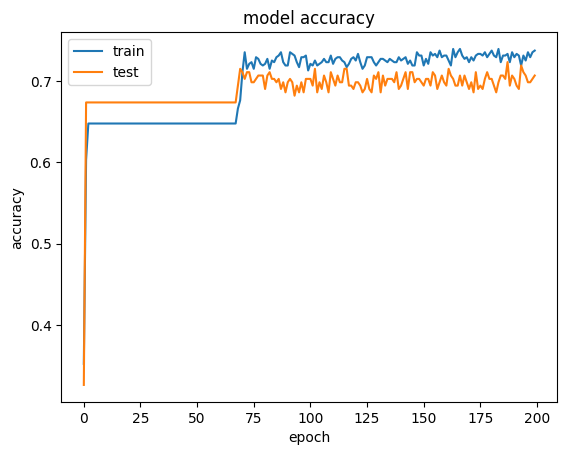

In [87]:
#summarize
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

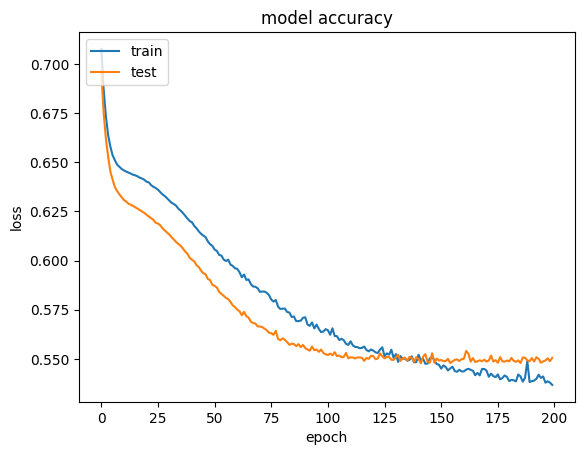

In [88]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc = 'upper left')
plt.show()